In [217]:
from statsmodels.graphics.tsaplots import plot_predict
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from scipy.stats import pearsonr

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import datetime


In [37]:
# Load data from raw_data
data = np.load('../raw_data/X_train_copernicus.npz', allow_pickle=True)

In [38]:
# Extract features from data
GHI = data['GHI']
CLS = data['CLS']
SAA = data['SAA']
SZA = data['SZA']
DATE = data['datetime']

In [39]:
def n_obs_in_day(observation = 96):
    DATE[observation]
    number_obs_day = 0 
    for i in range(8):
        if DATE[observation+i].day == DATE[observation].day:
            number_obs_day += 1
    return number_obs_day
    
n_obs_in_day()
   

4

In [156]:
# defining time variable 
def arr_time(observation= 96):
    arr_time_day = []
    
    time = datetime.datetime(year=DATE[observation].year,\
                                    month=DATE[observation].month,
                                    day=DATE[observation].day,
                                    hour=DATE[observation].hour,
                                    minute=DATE[observation].minute)
    delta = datetime.timedelta(minutes=15)
    time = time - datetime.timedelta(minutes=60)
    # we're setting the num of obs in day\n",
    observation_max = n_obs_in_day(observation)
    for j in range(observation_max):
        for i in range(8):
            time = time+delta
            arr_time_day.append(time)
    
    arr_time_day  = np.array(arr_time_day)
    return arr_time_day

In [157]:
arr_time().shape

(32,)

In [138]:
# defining solar elevation as per Federico definition 
def arr_sol_elevation(
    feature = SAA, # 
    observation = 96): 
    arr_sol_elev_day = []
    
    # we're setting the num of obs in day\n",
    observation_max = n_obs_in_day(observation)
    
    for j in range(observation_max):
        for i in range(8):
            arr_sol_elev_day.append(90-(round((feature[observation+j,i,:,:]).mean(),2)))   
    arr_sol_elev_day = np.array(arr_sol_elev_day)
    return arr_sol_elev_day 

In [42]:
def arr_feature(
    feature = CLS,
    observation = 96): 
    arr_day = []
    
    # we're setting the num of obs in day\n",
    observation_max = n_obs_in_day(observation)
    
    for j in range(observation_max):
        for i in range(8):
            arr_day.appendround((feature[observation+j,i,:,:]).mean(),2))
    arr_day = np.array(arr_day)
    return arr_day

    

In [240]:
# defining arrays 
arr_CLS = arr_feature(feature = CLS, observation = 96)
arr_SAA = arr_feature(feature = SAA, observation = 96)
arr_SZA = arr_feature(feature = SZA, observation = 96)
# setting Solar Angle Elevation as SAE
arr_SAE = arr_sol_elevation(feature = SAA, observation = 96)
arr_time_obs = arr_time(observation= 96)

## Polynomial Regression

### Plotting features

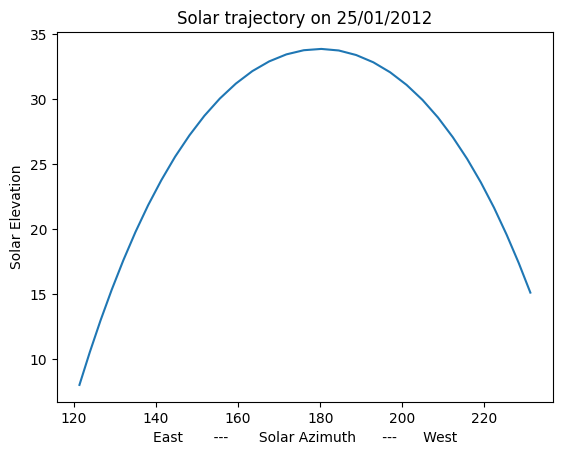

In [167]:
plt.title("Solar trajectory on 25/01/2012")
plt.ylabel("Solar Elevation")
plt.xlabel("East       ---       Solar Azimuth      ---      West")
plt.plot(arr_SZA,arr_SAE)

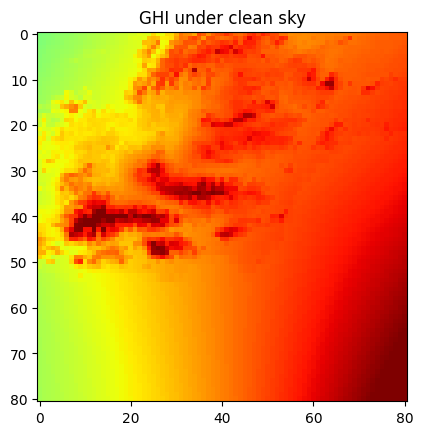

In [266]:
# Displaying one observation
plt.title("GHI under clean sky")
plt.imshow(
    CLS[96, 0,:,:], cmap='jet', norm='linear', vmin=30, vmax=120)

### SAA and CLS

In [264]:
# set as x variable - predictor
x = arr_SAA.reshape((-1, 1))
x2 = arr_SZA.reshape((-1, 1))
# set as y variable - response 
y = arr_CLS

In [180]:
# x - SAA
# y - CLS
# modifying array
# modifying array
x_ = PolynomialFeatures(degree=2, include_bias=False).fit_transform(x)
print(x_.shape)
model = sm.OLS(y, x_).fit()
ypred = model.predict(x_) 
ypred.shape


(32, 2)


(32,)

In [175]:
[model.summary()]

[<class 'statsmodels.iolib.summary.Summary'>
 """
                                  OLS Regression Results                                
 Dep. Variable:                      y   R-squared (uncentered):                   0.998
 Model:                            OLS   Adj. R-squared (uncentered):              0.998
 Method:                 Least Squares   F-statistic:                              7721.
 Date:                Fri, 02 Dec 2022   Prob (F-statistic):                    2.06e-41
 Time:                        18:43:43   Log-Likelihood:                         -140.97
 No. Observations:                  32   AIC:                                      285.9
 Df Residuals:                      30   BIC:                                      288.9
 Df Model:                           2                                                  
 Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|     

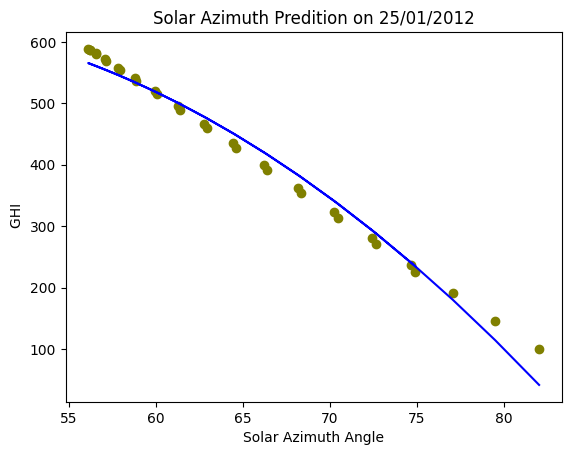

In [262]:
plt.title("Solar Azimuth Predition on 25/01/2012")
plt.xlabel("Solar Azimuth Angle")
plt.ylabel("        GHI       ")
plt.scatter(x,y, color='olive')
plt.plot(x,ypred, color='blue')

### SZA and CLS

In [176]:
# x2 - SZA
# y - CLS
# modifying array
# modifying array
x2_ = PolynomialFeatures(degree=2, include_bias=False).fit_transform(x2)
print(x2_.shape)
model2 = sm.OLS(y, x2_).fit()
ypred = model2.predict(x2_) 
ypred.shape

(32, 2)


(32,)

In [177]:
[model2.summary()]

[<class 'statsmodels.iolib.summary.Summary'>
 """
                                  OLS Regression Results                                
 Dep. Variable:                      y   R-squared (uncentered):                   0.919
 Model:                            OLS   Adj. R-squared (uncentered):              0.914
 Method:                 Least Squares   F-statistic:                              171.3
 Date:                Fri, 02 Dec 2022   Prob (F-statistic):                    3.88e-17
 Time:                        18:46:55   Log-Likelihood:                         -200.59
 No. Observations:                  32   AIC:                                      405.2
 Df Residuals:                      30   BIC:                                      408.1
 Df Model:                           2                                                  
 Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|     

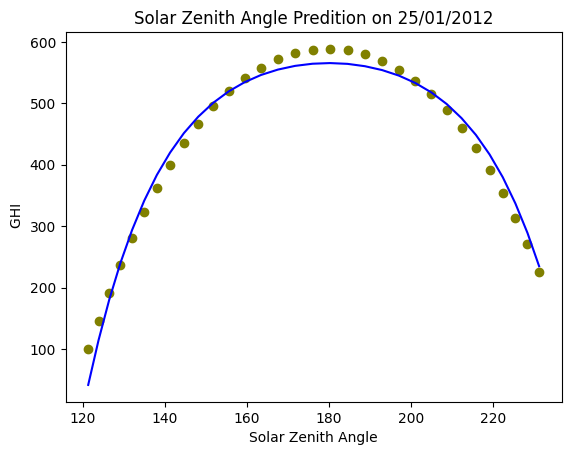

In [263]:
plt.title("Solar Zenith Angle Predition on 25/01/2012")
plt.xlabel("Solar Zenith Angle")
plt.ylabel("        GHI       ")
plt.scatter(x2,y, color='olive')
plt.plot(x2,ypred, color='blue')

### Heatmap

In [233]:
features_df = pd.DataFrame({'CLS': arr_CLS, 'SAA': arr_SAA, 'SZA': arr_SZA})

<AxesSubplot: >

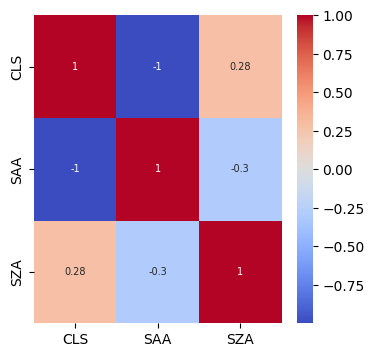

In [234]:
features_df = pd.DataFrame({'CLS': arr_CLS, 'SAA': arr_SAA, 'SZA': arr_SZA})
plt.figure(figsize = (4,4))
sns.heatmap(features_df.corr(),cmap = 'coolwarm', annot = True, annot_kws = {"size": 7})

In [250]:
# instance and fitting
x3 = arr_SZA.reshape((-1, 1))
model_lin = LinearRegression().fit(x3, y)
r_sq_lin = model_lin.score(x3, y)
print()
print(f"linear regression - coefficient of determination: {r_sq_lin}")


linear regression - coefficient of determination: 0.07968160356161635


In [251]:
# apply the pearsonr()
# CLS and SZA features
corr, _ = pearsonr(arr_CLS, arr_SZA)
print('Pearsons correlation: %.3f' % corr)
print('DOC: the Pearson correlation coefficient measures the linear relationship between two datasets')
print('It seems to not be appropriate for our data')


Pearsons correlation: 0.282
DOC: the Pearson correlation coefficient measures the linear relationship between two datasets
It seems to not be appropriate for our data


## Conclusion

### Solar Azimuth Angle seems to be highly correlated with GHI under clean sky 
### Solar Zenith Angle seems to be highly correlated with GHI under clean sky 
### Heatmap is based on linear relationship so it seems to be not method for our data